# Skill estimation using Stan

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import pickle
import seaborn as sns
from collections import defaultdict

## Data analysis

In [63]:
train = pd.read_csv('data/train.csv', header = None)
train.head(50)

,0,1,2,3,4,5,6,7,8,9
0,09/19/2016,MC,[loser],0–2,Stats,[winner],P,P,LotV,online
1,09/19/2016,MC,[loser],1–2,Dark,[winner],P,Z,LotV,online
2,09/13/2016,MC,[loser],0–2,INnoVation,[winner],P,T,LotV,online
3,08/27/2016,MC,[loser],0–1,TRUE,[winner],P,Z,LotV,online
4,07/16/2016,MC,[winner],1–0,Super,[loser],P,P,LotV,offline
5,07/16/2016,MC,[winner],1–0,aLive,[loser],P,T,LotV,offline
6,07/16/2016,MC,[winner],1–0,Curious,[loser],P,Z,LotV,offline
7,07/06/2016,MC,[loser],0–2,Zest,[winner],P,P,LotV,offline
8,07/06/2016,MC,[loser],0–2,GuMiho,[winner],P,T,LotV,offline
9,07/06/2016,MC,[winner],2–1,Zest,[loser],P,P,LotV,offline


In [67]:
train[train[1] == "Stats"]

,0,1,2,3,4,5,6,7,8,9
13547,10/18/2017,Stats,[winner],2–0,INnoVation,[loser],P,T,LotV,online
13548,10/15/2017,Stats,[winner],3–0,aLive,[loser],P,T,LotV,online
13549,10/15/2017,Stats,[winner],3–2,INnoVation,[loser],P,T,LotV,online
13550,10/10/2017,Stats,[loser],1–2,Elazer,[winner],P,Z,LotV,online
13551,10/03/2017,Stats,[loser],0–2,Dear,[winner],P,P,LotV,online
...,...,...,...,...,...,...,...,...,...,...
13960,08/12/2012,Stats,[winner],1–0,Bbyong,[loser],P,T,WoL,offline
13961,08/05/2012,Stats,[winner],1–0,RorO,[loser],P,Z,WoL,offline
13962,07/27/2012,Stats,[winner],2–0,BrAvO,[loser],P,T,WoL,offline
13963,07/22/2012,Stats,[loser],0–2,TheStC,[winner],P,T,WoL,offline


In [68]:
valid[valid[1] == "Stats"]

,0,1,2,3,4,5,6,7,8,9
6463,10/18/2017,Stats,[winner],3–0,TY,[loser],P,T,LotV,online
6464,10/18/2017,Stats,[winner],2–0,GuMiho,[loser],P,T,LotV,online
6465,10/18/2017,Stats,[winner],2–1,Billowy,[loser],P,P,LotV,online
6466,10/15/2017,Stats,[loser],2–3,herO,[winner],P,P,LotV,online
6467,10/11/2017,Stats,[loser],0–2,TY,[winner],P,T,LotV,online
...,...,...,...,...,...,...,...,...,...,...
6720,10/07/2012,Stats,[winner],2–0,Illusion,[loser],P,T,WoL,online
6721,10/07/2012,Stats,[winner],2–0,SpeCial,[loser],P,T,WoL,online
6722,07/19/2012,Stats,[loser],0–2,Classic,[winner],P,T,WoL,offline
6723,07/15/2012,Stats,[loser],0–1,TurN,[winner],P,T,WoL,offline


In [3]:
valid = pd.read_csv('data/valid.csv', header = None)
valid.head(10)

,0,1,2,3,4,5,6,7,8,9
0,09/19/2016,MC,[winner],2–1,NaTuRal,[loser],P,T,LotV,online
1,07/17/2016,MC,[loser],0–1,Cure,[winner],P,T,LotV,offline
2,06/17/2016,MC,[winner],3–2,Journey,[loser],P,T,LotV,offline
3,05/12/2016,MC,[loser],0–2,Trust,[winner],P,P,LotV,offline
4,05/11/2016,MC,[loser],1–2,Billowy,[winner],P,P,LotV,offline
5,05/11/2016,MC,[winner],2–1,Trust,[loser],P,P,LotV,offline
6,04/22/2016,MC,[loser],1–2,ByuN,[winner],P,T,LotV,online
7,04/21/2016,MC,[winner],2–1,Polt,[loser],P,T,LotV,online
8,04/17/2016,MC,[winner],3–1,Jim,[loser],P,P,LotV,online
9,04/15/2016,MC,[loser],0–2,Jim,[winner],P,P,LotV,online


#### Scores

In [47]:
scores = defaultdict(list)
all_score = []
score_diff = []
for index, row in train.iterrows():
    sa, sb = row[3].split('–')
    a, b = row[1], row[4]
#     scores[a].append(int(sa))
#     scores[b].append(int(sb))
    scores[a].append(int(sa)-int(sb))
    scores[b].append(int(sb)-int(sa))
    all_score.append(int(sa)+int(sb))
    score_diff.append(int(sa)-int(sb))

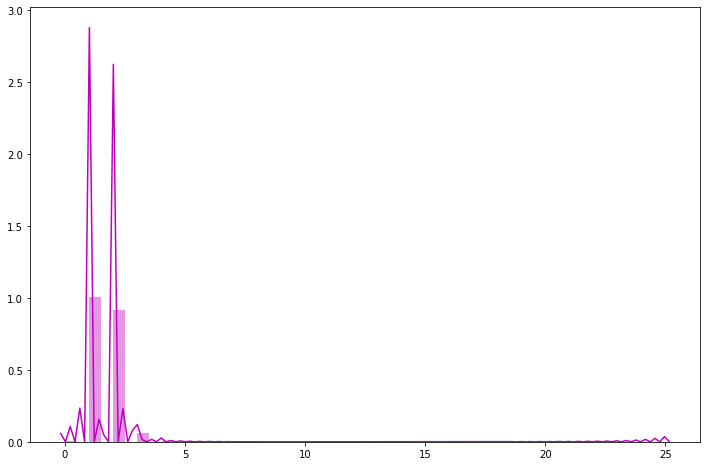

In [46]:
plt.figure(figsize=(12,8))
sns.distplot(np.abs(score_diff), color="m")
# plt.hist(np.abs(score_diff)+0.5, color="m")
# plt.yscale("log")
plt.show()

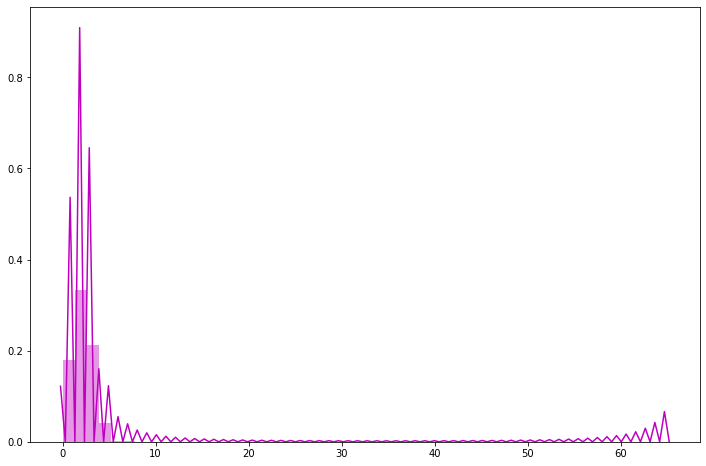

In [38]:
plt.figure(figsize=(12,8))
sns.distplot(all_score, color="m")
plt.show()

0.44


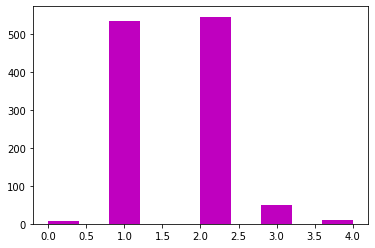

0.4467065868263473


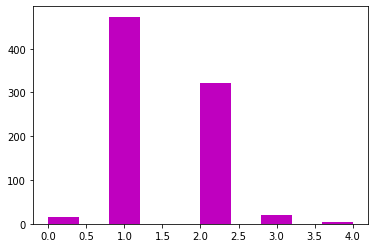

0.526813880126183


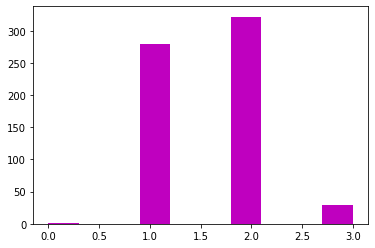

0.7690631808278867


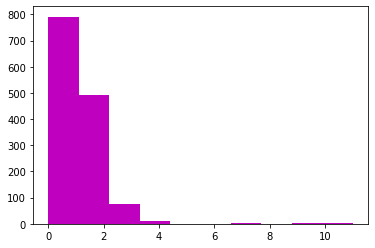

0.6444708680142688


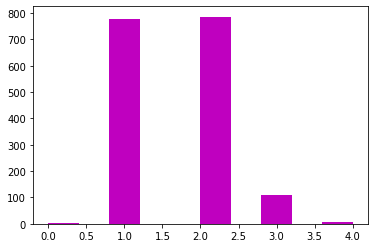

0.12370160528800755


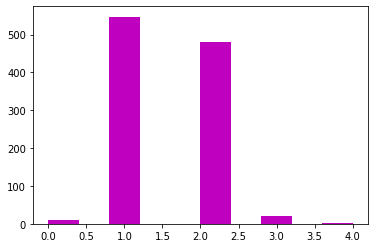

0.29028871391076116


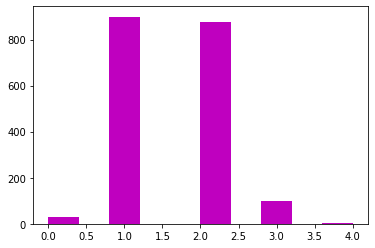

0.13838748495788206


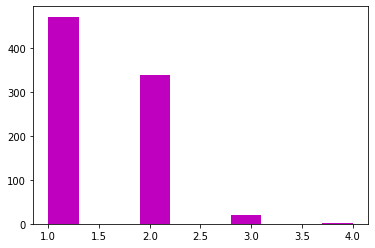

0.46129374337221635


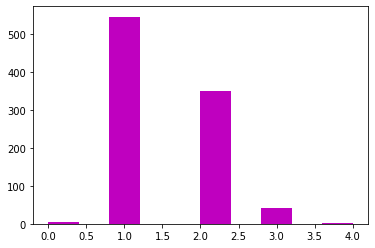

0.5627440044617958


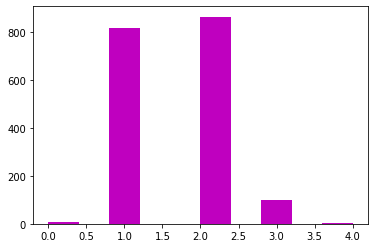

In [50]:
for i, key in enumerate(scores):
    if i >=10:
        break
    print(np.mean(scores[key]))
    plt.hist(np.abs(scores[key]), color="m")
    plt.show()
    

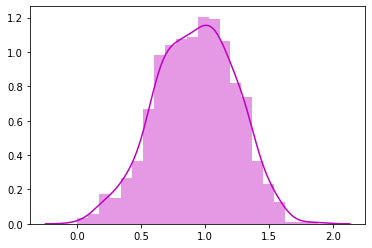

In [29]:
lamb = []
for key in scores:
    lamb.append(np.mean(scores[key]))
    
sns.distplot(lamb, color="m")
plt.show()

#### Match Date


In [52]:
from datetime import datetime

In [65]:
prev = datetime.strptime("09/19/2016", "%m/%d/%Y")
prev_p = "MC"
for index, row in train.iterrows():
    if row[1] != prev_p:
        prev = datetime.strptime(row[0], "%m/%d/%Y")
        prev_p = row[1]
        continue
        
    curr = datetime.strptime(row[0], "%m/%d/%Y")
    if curr > prev:
        print(curr)
        print(prev)
        break
    prev = curr
    

It means that the data is sorted in datetime order

In [54]:
seen_rev = {}
date_late = []
for index, row in sorted(train.iterrows(), reverse = True, key=lambda date: datetime.strptime(date[1][0], "%m/%d/%Y")):
    if row[1] not in seen_rev:
        seen_rev[row[1]] = row[0]
        date_late.append(datetime.strptime(row[0], "%m/%d/%Y"))
    
    if row[4] not in seen_rev:
        seen_rev[row[4]] = row[0]
        date_late.append(datetime.strptime(row[0], "%m/%d/%Y"))

In [56]:
seen = {}
date_early = []
for index, row in sorted(train.iterrows(), key=lambda date: datetime.strptime(date[1][0], "%m/%d/%Y")):
    if row[1] not in seen:
        seen[row[1]] = row[0]
        date_early.append(datetime.strptime(row[0], "%m/%d/%Y"))
    
    if row[4] not in seen:
        seen[row[4]] = row[0]
        date_early.append(datetime.strptime(row[0], "%m/%d/%Y"))
        
seen

{'HasuObs': '02/25/2010',
 'White-Ra': '02/25/2010',
 'DIMAGA': '02/27/2010',
 'Strelok': '02/27/2010',
 'Brat_OK': '02/27/2010',
 'Orly': '02/28/2010',
 'kAra': '02/28/2010',
 'Naama': '03/06/2010',
 'Wilko': '03/06/2010',
 'NightEnD': '03/06/2010',
 'MoMaN': '03/06/2010',
 'merz': '03/06/2010',
 'MorroW': '03/07/2010',
 'HayprO': '03/07/2010',
 'CrunCher': '03/07/2010',
 'TLO': '03/14/2010',
 'DeMusliM': '03/14/2010',
 'KenZy': '03/14/2010',
 'ClouD': '03/14/2010',
 'Tarson': '03/14/2010',
 'LucifroN': '03/19/2010',
 'XlorD': '03/19/2010',
 'Naugrim': '03/19/2010',
 'Jinro': '03/21/2010',
 'LaLuSh': '03/21/2010',
 'Ret': '03/27/2010',
 'NaNiwa': '03/28/2010',
 'Socke': '03/29/2010',
 'Rine': '03/31/2010',
 'Kas': '03/31/2010',
 'DeViL': '03/31/2010',
 'IdrA': '04/03/2010',
 'Zelniq': '04/03/2010',
 'mOOnGLaDe': '04/03/2010',
 'qxc': '04/03/2010',
 'LzGaMeR': '04/03/2010',
 'Machine': '04/03/2010',
 'Sen': '04/04/2010',
 'Bischu': '04/04/2010',
 'GoOdy': '04/04/2010',
 'Fuzer': '04/04

In [61]:
max(date_early)

datetime.datetime(2017, 7, 20, 0, 0)

In [60]:
max(date_late)

datetime.datetime(2017, 10, 18, 0, 0)

In [9]:
seen_val = {}
for index, row in sorted(valid.iterrows(), key=lambda date: datetime.strptime(date[1][0], "%m/%d/%Y")):
    if row[1] not in seen_val:
        seen_val[row[1]] = row[0]
    
    if row[4] not in seen_val:
        seen_val[row[4]] = row[0]
        
seen_val

{'DIMAGA': '02/28/2010',
 'Orly': '02/28/2010',
 'LaLuSh': '02/28/2010',
 'MoMaN': '02/28/2010',
 'NightEnD': '03/07/2010',
 'TLO': '03/14/2010',
 'Socke': '03/14/2010',
 'MorroW': '03/14/2010',
 'Brat_OK': '03/15/2010',
 'White-Ra': '03/15/2010',
 'Strelok': '03/15/2010',
 'Naugrim': '03/19/2010',
 'PredY': '03/20/2010',
 'Naama': '03/20/2010',
 'IdrA': '03/21/2010',
 'HayprO': '03/21/2010',
 'Sen': '03/27/2010',
 'KenZy': '03/27/2010',
 'GoOdy': '03/27/2010',
 'Jinro': '03/27/2010',
 'NaNiwa': '03/28/2010',
 'SLiDeR': '03/28/2010',
 'HasuObs': '04/01/2010',
 'LucifroN': '04/01/2010',
 'qxc': '04/03/2010',
 'iNcontroL': '04/03/2010',
 'XlorD': '04/03/2010',
 'ho8ot': '04/03/2010',
 'LzGaMeR': '04/03/2010',
 'Zelniq': '04/03/2010',
 'DeMusliM': '04/04/2010',
 'Fuzer': '04/07/2010',
 'Adelscott': '04/09/2010',
 'MaNa': '04/10/2010',
 'Sheth': '04/13/2010',
 'KiWiKaKi': '04/13/2010',
 'drewbie': '04/13/2010',
 'HuK': '04/15/2010',
 'DeViL': '04/16/2010',
 'Loner': '04/16/2010',
 'Check':

In [12]:
time_diff = {}
for name, date in seen.items():
    time_diff[name] = datetime.strptime(date, "%m/%d/%Y") - datetime.strptime(seen_val[name], "%m/%d/%Y")

In [13]:
time_diff

{'HasuObs': datetime.timedelta(days=-35),
 'White-Ra': datetime.timedelta(days=-18),
 'DIMAGA': datetime.timedelta(days=-1),
 'Strelok': datetime.timedelta(days=-16),
 'Brat_OK': datetime.timedelta(days=-16),
 'Orly': datetime.timedelta(0),
 'kAra': datetime.timedelta(days=-136),
 'Naama': datetime.timedelta(days=-14),
 'Wilko': datetime.timedelta(days=-145),
 'NightEnD': datetime.timedelta(days=-1),
 'MoMaN': datetime.timedelta(days=6),
 'merz': datetime.timedelta(days=-75),
 'MorroW': datetime.timedelta(days=-7),
 'HayprO': datetime.timedelta(days=-14),
 'CrunCher': datetime.timedelta(days=-298),
 'TLO': datetime.timedelta(0),
 'DeMusliM': datetime.timedelta(days=-21),
 'KenZy': datetime.timedelta(days=-13),
 'ClouD': datetime.timedelta(days=-34),
 'Tarson': datetime.timedelta(days=-46),
 'LucifroN': datetime.timedelta(days=-13),
 'XlorD': datetime.timedelta(days=-15),
 'Naugrim': datetime.timedelta(0),
 'Jinro': datetime.timedelta(days=-6),
 'LaLuSh': datetime.timedelta(days=21),
 '

#### win propotion for different races

In [26]:
race_all = np.zeros((3,3))
race_win = np.zeros((3,3))
race = {'P':0, 'T':1, 'Z':2}
for index, row in train.iterrows():
    win = row[2] == '[winner]'
    if row[6] =='R' or row[7] =='R' :
        continue
    ra = race[row[6]]
    rb = race[row[7]]
    if rb != ra:
        race_all[rb,ra] += 1
        race_all[ra,rb] += 1
        if win:
            race_win[ra, rb] += 1
        else:
            race_win[rb, ra] += 1
    else:
        race_all[ra,rb] += 1    
        if win:
            race_win[ra, rb] += 1        

In [27]:
print(race_win)
print(race_all)
print(race_win/race_all)

[[ 9326. 17587. 23751.]
 [19092.  7837. 22219.]
 [25869. 21417. 14294.]]
[[18504. 36679. 49620.]
 [36679. 15545. 43636.]
 [49620. 43636. 28426.]]
[[0.50399914 0.47948417 0.4786578 ]
 [0.52051583 0.50414924 0.50918966]
 [0.5213422  0.49081034 0.5028495 ]]


#### win propotion for different addon

In [28]:
race_all = np.zeros((3,3))
race_win = np.zeros((3,3))
race = {'P':0, 'T':1, 'Z':2}
for index, row in train.iterrows():
    win = row[2] == '[winner]'
    if row[6] =='R' or row[7] =='R' or row[8] != 'LotV':
        continue
    ra = race[row[6]]
    rb = race[row[7]]
    if rb != ra:
        race_all[rb,ra] += 1
        race_all[ra,rb] += 1
        if win:
            race_win[ra, rb] += 1
        else:
            race_win[rb, ra] += 1
    else:
        race_all[ra,rb] += 1    
        if win:
            race_win[ra, rb] += 1        
            
            
print(race_win)
print(race_all)
print(race_win/race_all)

[[2121. 4497. 6372.]
 [5187. 2474. 7399.]
 [7637. 6923. 4974.]]
[[ 4186.  9684. 14009.]
 [ 9684.  4898. 14322.]
 [14009. 14322.  9893.]]
[[0.50668896 0.46437423 0.45485045]
 [0.53562577 0.50510412 0.51661779]
 [0.54514955 0.48338221 0.50277974]]
